# Random Forest- Regression- Company Sales data

After performing data cleaning, analysis and modelling using Decision Tree algorithm. We shall continue and apply random forest algorithm on the same.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Company_Data_modified.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [3]:
X = df.drop(columns='Sales')
y = df['Sales']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators':[100,200,300],'bootstrap':['True','False'],'criterion':['mse','mae']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['mse', 'mae'],
                         'n_estimators': [100, 200, 300]})

In [11]:
grid.best_params_

{'bootstrap': 'True', 'criterion': 'mse', 'n_estimators': 300}

In [12]:
grid.best_estimator_

RandomForestRegressor(bootstrap='True', n_estimators=300, random_state=42)

In [19]:
# Optimising n_estimators
from sklearn.metrics import mean_squared_error
error = []
for n in range(200,1000,50):
    model = RandomForestRegressor(bootstrap='True', n_estimators=n, criterion='mse', random_state=42)
    model.fit(X_train,y_train)
    error.append(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))

Text(0, 0.5, 'Error')

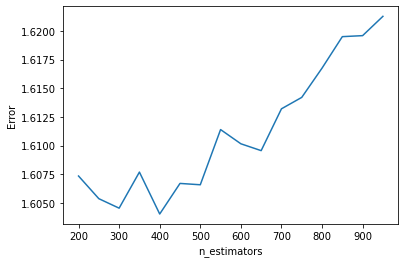

In [24]:
plt.plot(range(200,1000,50),error,label='Error');
plt.xlabel('n_estimators')
plt.ylabel('Error')

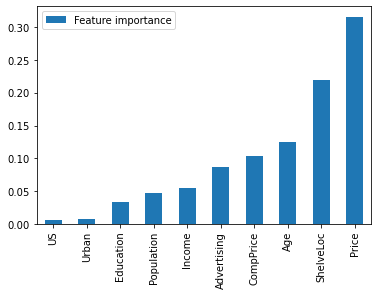

In [27]:
model = RandomForestRegressor(bootstrap='True', n_estimators=400, criterion='mse', random_state=42)
model.fit(X_train,y_train)
pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Feature importance']).sort_values(by='Feature importance').plot(kind='bar');

In [28]:
# Matrix evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test,model.predict(X_test)))
print(mean_absolute_error(y_test,model.predict(X_test)))

2.572933804619796
1.2976081250000011


# Thank you!